In [ ]:
!pip -q install huggingface_hub langchain openai tiktoken > /dev/null

In [ ]:
import tweepy
import pandas as pd 
import json
from datetime import datetime

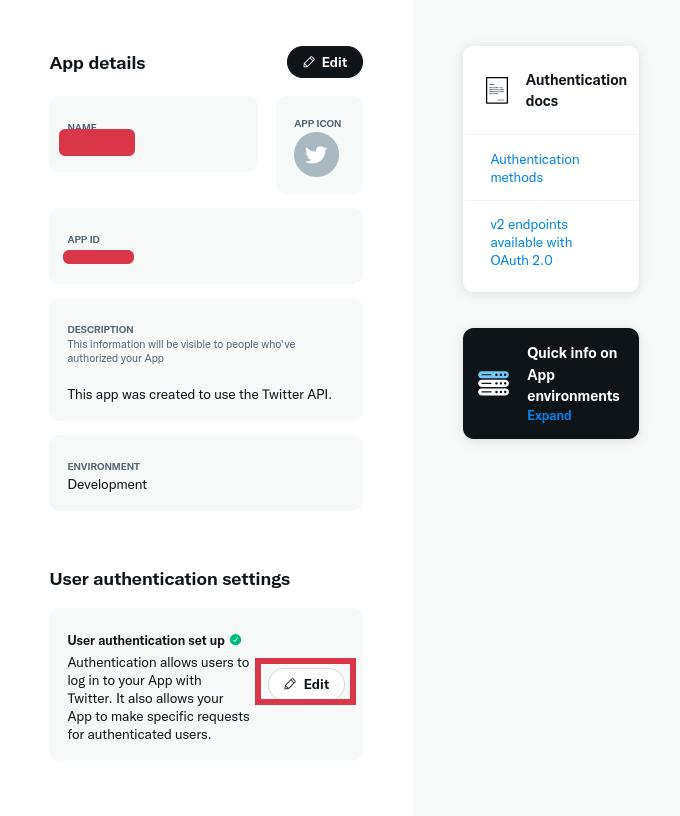

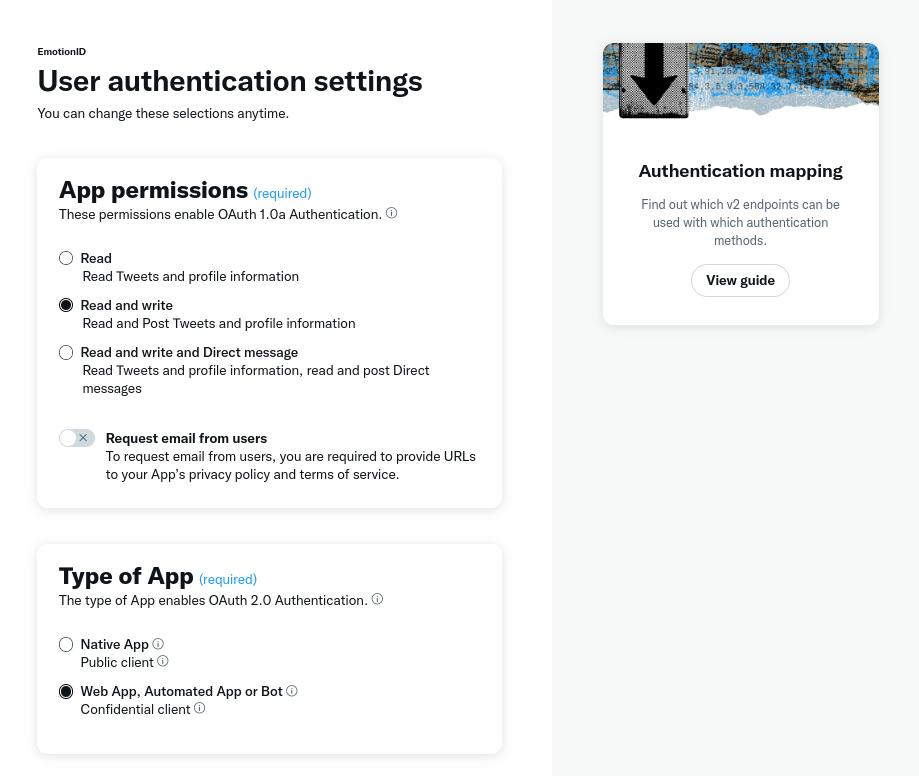

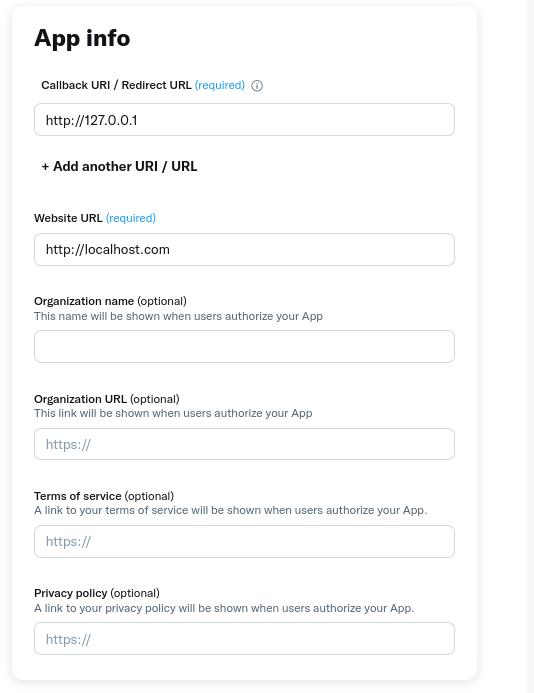

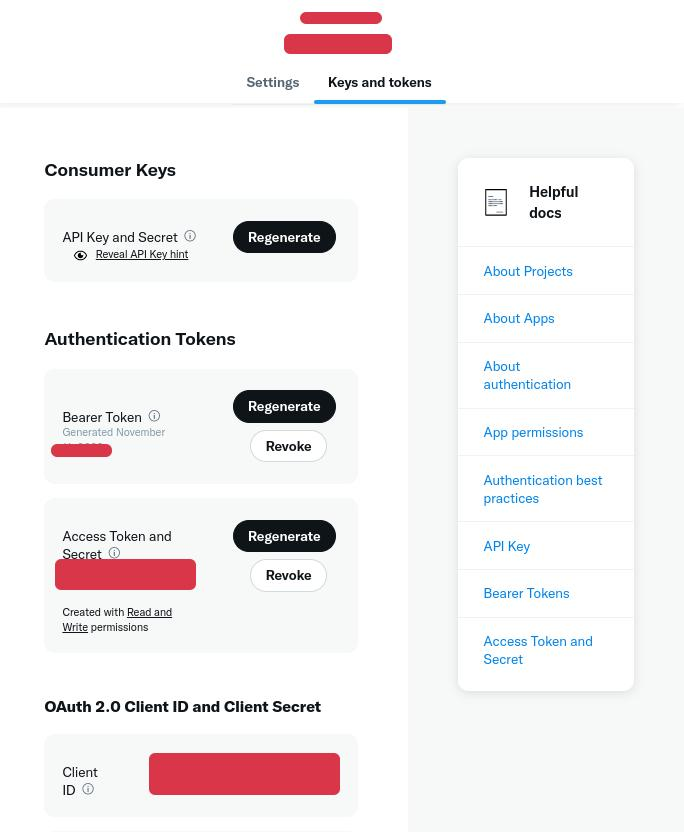

In [ ]:
import configparser

In [ ]:
config = configparser.ConfigParser()

In [ ]:
config.read_file(open('clustwiter.config'))

**API key and secret:**

Think of these as the user name and password that represents your Twitter developer app when making API requests. 

oauth_consumer_key

oauth_consumer_secret


**Access token and secret:**
An access token and access token secret are user-specific credentials used to authenticate OAuth 1.0a API requests. They specify the Twitter account the request is made on behalf of.

You can generate your own access token and token secret if you would like your app to make requests on behalf of the same Twitter account associated with your developer account on the Twitter developer app's details page.

oauth_token

oauth_token_secret


In [ ]:
access_key = config['TWITTER']['access_token'] 
access_secret = config['TWITTER']['access_secret']
consumer_key = config['TWITTER']['api_key']
consumer_secret = config['TWITTER']['api_secret']

In [ ]:
bearerToken = config['TWITTER']['bearer_token']

In [ ]:
pulseBearer = config['PULSE']['bearer_token']

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [ ]:
auth.set_access_token(access_key, access_secret)

In [ ]:
api = tweepy.API(auth)

In [ ]:
public_tweets = api.home_timeline()

In [ ]:
for tweet in public_tweets[:5]:
    print(tweet.author.id)
    print(tweet.author.name)
    print(tweet.author.screen_name)
    print(tweet.text)
    print(tweet.retweet_count)

In [ ]:
home_tweet = []
for tweet in public_tweets:
  home_tweet.append(tweet.text)

home_tweet = '\n'.join(home_tweet[-5:])

In [ ]:
api.search_tweets("langchain")

https://docs.tweepy.org/en/stable/examples.html

In [ ]:
client = tweepy.Client(consumer_key=consumer_key,
                       consumer_secret=consumer_secret,
                       access_token=access_key,
                       access_token_secret=access_secret)

In [ ]:
response = client.create_tweet(text="""This is a tweet that passed through the Python machination
and reached the light of the twitter timeline""")

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ''

In [ ]:
from langchain import PromptTemplate, LLMChain
from langchain.llms import OpenAI

template = """Write a haiku from the following data.  
{Data}"""

prompt = PromptTemplate(template=template, 
                        input_variables=["Data"])

llm_chain = LLMChain(prompt=prompt, 
                     llm=OpenAI(temperature=0))

In [ ]:
print(llm_chain.run(home_tweet))



Voice reveals health
Rival factions refuse peace
Green bonds finance low-carbon


In [ ]:
def post_tweet(llmChain):
  public_tweets = api.home_timeline()
  
  home_tweet = []

  for tweet in public_tweets:
    home_tweet.append(tweet.text)

  home_tweet = '\n'.join(home_tweet[-5:])

  haiku = llmChain.run(home_tweet)

  response = client.create_tweet(text=haiku+" #MadeByAI")

  return response

In [ ]:
status = post_tweet(llmChain=llm_chain)

In [ ]:
status

Response(data={'edit_history_tweet_ids': ['1650898545535520768'], 'id': '1650898545535520768', 'text': "Iron stool nailed down\nTiny window, no escape seen\nInflation's harsh toll #MadeByAI"}, includes={}, errors=[], meta={})